<a href="https://colab.research.google.com/github/IshantWadhwa4/Finance-Analytics/blob/master/FinancialFraudsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Frauds Detection**










## Table of Contents

1.   [Problem Statment](#Section1)
2.   [Data Acquisition & Description](#Section2)
3.   [Data Pre-processing](#Section3)
4.   [Pre-Exploratory Data Analysis](#Section4)
5.   [Post Data Processing & Analysis](#Section5)
6.   [Model Evaluation](#Section6)



<a id = "Section1"> </a>
## Problem Statement

Let's say a company named as **IPAYU** has been **providing** it's **financial services** to the variety of users in a country. But at the same time **there are loopholes in security measures** (in the meanwhile company is upgrading it's security). **Fraudster** might try to crack inside the company's interface and **can commit fraudulent transactions**. It may harm people trust towards the company. To tackle this situation of crisis, **they** have **consulted a team of data scientists**.

Now the question is how this problem could be solved using data science? While there are many ways to prevent the fraud and loss occur. Let's walk through a simple pave how this team handled problem of **fraudulent transaction to identify and automated model for future transactions.**

The **target feature** in the acquired data set is **check_fraud** over the customer transactions.

|Target Feature|Potential Values|
| :-- | :-- |
|check_fraud|0: Not Fraud|
||1: Fraud|

<a id = "Section2"> </a>
## Data Acquisition & Description

### Basic EDA

In [0]:
# lib cell
import pandas as pd
import numpy as np

In [0]:
# get data
data = pd.read_csv(filepath_or_buffer='https://storage.googleapis.com/industryanalytics/trans_fraud_data.csv')
data.head()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [0]:
data.shape
# its a huge data with almost 6.3m rows and 10 columns

(6362620, 10)

Now we have 10 columns lets understand each one by one
1. step: It is the time at which the transaction happen, its in a unit time not exect and that unit may be any thing 1 sec 1 hour or 1 day
2. trans_type: It is the type of amount transfer PAYMENT,TRANSFER,CASH_OUT etc.
3. trans_amount: Amount trans to other account
4. sender_name: Name(Id) of sender
5. sender_old_bal:
6. sender_new_balance
7. receiver : name(Id) of receiver
8. receiver_old_bal:
9. receiver_new_bal:
10. check_fraud: column has 0 or 1 if 0 its not a fraud if 1 its a fraud 


Our motive is to find future tractions are fraud or not.
check_fraud is target variable.
</br>
Its a **supervised classification** Probelm.

In [0]:
# lets understand the data 
data.info()

# Check_fraud should be object left all are good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   trans_type        object 
 2   trans_amount      float64
 3   sender_name       object 
 4   sender_old_bal    float64
 5   sender_new_bal    float64
 6   receiver          object 
 7   receiver_old_bal  float64
 8   receiver_new_bal  float64
 9   check_fraud       int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [0]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Columns: 10 entries, step to check_fraud
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [0]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

# Very unbalacnce data for target variable
# Seems outliers in trans_amount,sender_old_bal, sender_new_bal,receiver_old_bal,receiver_new_bal
# more than 50% 0's in sender_new_bal

,step,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00


In [0]:
# LIb : need pandas lib for this function.
# Parameters : Only required dataframe for which you want zeros and null for each column
# return: dataframe with number of zeros and null

def get_number_zeros_null(df):
  '''
       LIb : need pandas lib for this function.

       Input : Only required dataframe for which you want zeros and null for each column       
       Output: dataframe with number of zeros and null
  '''
  null_zero_dict={ }
  null_zero_dict['Number_of_nulls'] = df.isnull().sum()
  null_zero_dict['Number_of_zeros'] = (df==0).astype(int).sum()
  return pd.DataFrame(null_zero_dict).T


In [0]:
get_number_zeros_null(data)

# there is no null value in any column
# In trans_amount there are 16 zeros
  # Task 1: see they are fraud or not(how 0 amount can trans)
# sender old balance can be zero but no trans can happen (theis are my assumption which may or may not true)
# sender new balance can be zero if trans_amount == sender_old_bal (theis are my assumption which may or may not true)
# recever old baln can b zero but receiver new bal (theis are my assumption which may or may not true)
# check_fraud is target variable  
  # task 2: check it is balance or not    

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
Number_of_nulls,0,0,0,0,0,0,0,0,0,0
Number_of_zeros,0,0,16,0,2102449,3609566,0,2704388,2439433,6354407


In [0]:
# Check target variable is balance or not
def count_class_catagColumn(column_values):
  return pd.value_counts(column_values)


In [0]:
count_class_catagColumn(data['check_fraud'])
# very high unbalance data
# task 3: To make this data balance number of fraud and non fraud should be aprox equal

0    6354407
1       8213
Name: check_fraud, dtype: int64

### Visualization

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
def get_numeric_data_columns(df):
  '''
      return list of all numeric data columns name
  '''
  return list(df._get_numeric_data().columns)

In [0]:
def get_catagorical_data_columns(df):
  '''
      return list of all catagoric data columns name
  '''
  return list(set(df.columns) - set(df._get_numeric_data().columns))

In [0]:
def draw_countPlot_grid(df):
  import math
  fig=plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
  list_columns = get_catagorical_data_columns(df)
  n_rows = math.ceil(len(list_columns)/3)
  n_cols = 3
  for i, var_name in enumerate(list_columns):
    if len(df[var_name].unique()) < 8:
      ax=fig.add_subplot(n_rows,n_cols,i+1)
      sns.countplot(x = var_name, data=df)
      ax.set_title(var_name+" Distribution")
  fig.tight_layout()  # Improves appearance a bit.
  plt.show()

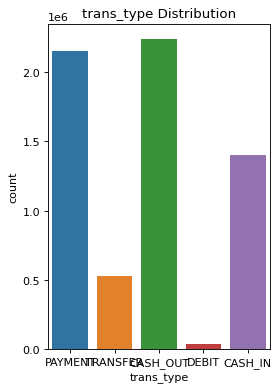

In [0]:
draw_countPlot_grid(data)
# trasns_type - payment and cash has max trasns and Debit has minimum value
# Task:  you can do here is check the max number of fraud in which type

In [0]:
def draw_distributionPlot_grid(df):
  import math
  fig=plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
  list_columns = get_numeric_data_columns(df)
  n_rows = math.ceil(len(list_columns)/3)
  n_cols = 3
  for i, var_name in enumerate(list_columns):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    sns.distplot(df[var_name],hist=True,axlabel=var_name)
    ax.set_title(var_name+" Distribution")
  fig.tight_layout()  # Improves appearance a bit.
  plt.show()

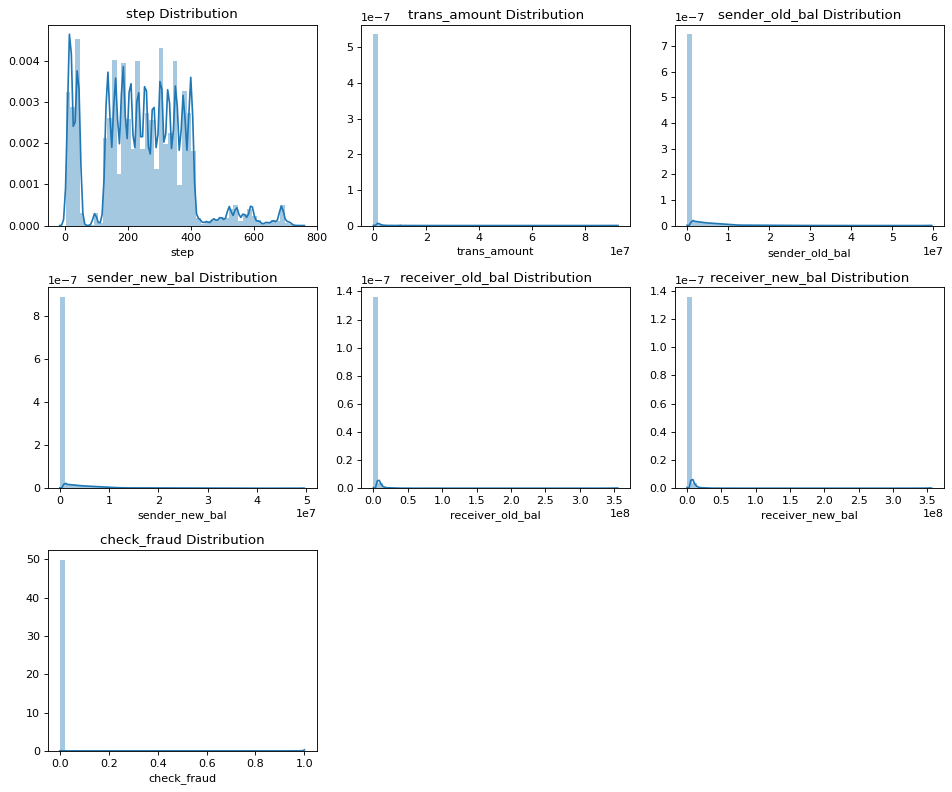

In [0]:
draw_distributionPlot_grid(data)
# nothing is proper distributes we need to log trasformation and almost every column has max number of zeros 

In [0]:
import plotly.express as px
fig = px.scatter_matrix(data[:1200], dimensions= list(data.columns))
fig.show()

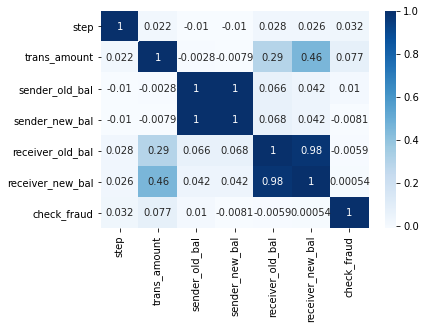

In [0]:
# heatmap
sns.heatmap(data=data.corr(),annot=True, cmap="Blues")

In [0]:
# create Heatmap for highly co-related(given threshold) columns
# seaborn pandas and numpy

def create_seaborn_heatmap_highcorelated(df,posThreshold,negThreshold):
  '''
      create Heatmap for highly co-related(given threshold) columns

      Input: dataframe, positive threshold, negitive threshold
      Plot: Heatmap
  '''
  df_corr = df.corr()
  tempdf = df_corr[(df_corr > posThreshold) | (df_corr < -negThreshold)]
  tempdf.replace(to_replace=1,value=np.nan,inplace=True)
  tempdf.dropna(axis=1,how='all',inplace=True)
  tempdf.dropna(axis=0,how='all',inplace=True)
  sns.heatmap(tempdf,annot=True, cmap="Blues")


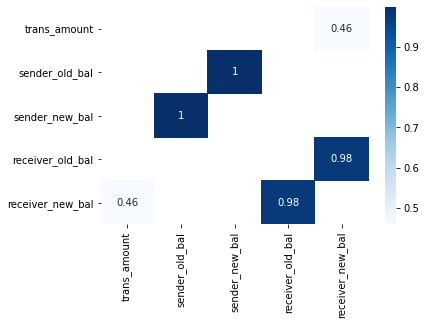

In [0]:
create_seaborn_heatmap_highcorelated(data,0.4,0.6)
# sender_new_balance and sender_old_balance, recever_old_bal and recever_new_bal all are highly corelated we can remove one one from both
# Experiment we can do once by removing the column and once by not removing

In [0]:
def draw_boxPlot_grid(df):
  import math
  fig=plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
  list_columns = get_numeric_data_columns(df)
  n_rows = math.ceil(len(list_columns)/3)
  n_cols = 3
  for i, var_name in enumerate(list_columns):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    sns.boxplot( y=df[var_name])
    ax.set_title(var_name+" Distribution")
  fig.tight_layout()  # Improves appearance a bit.
  plt.show()

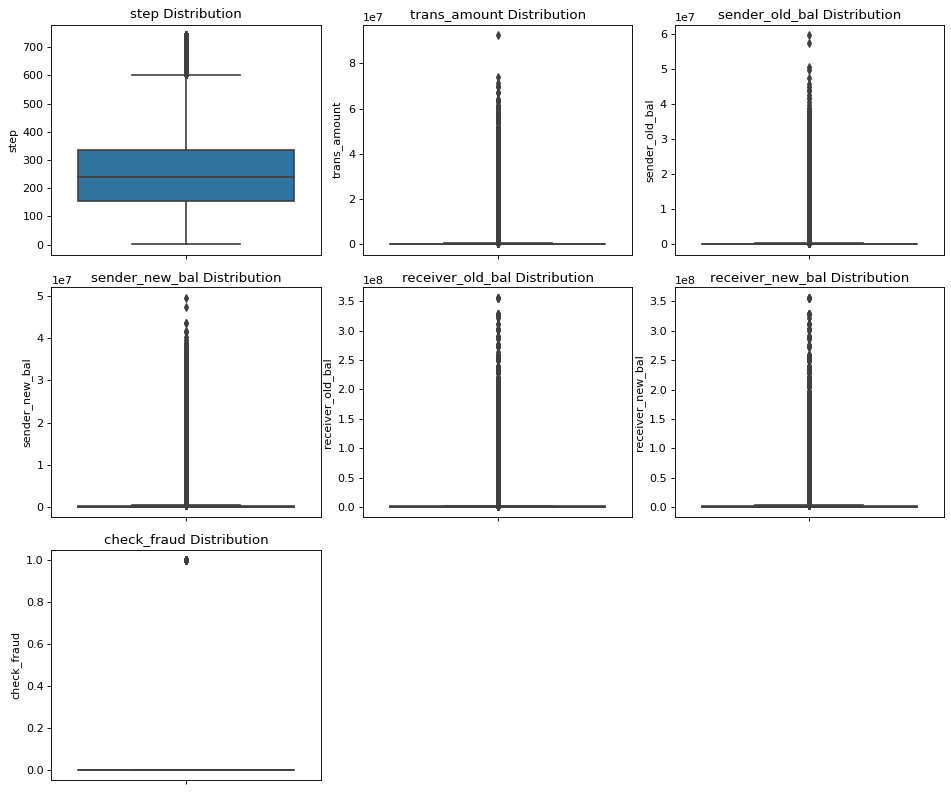

In [0]:
draw_boxPlot_grid(data)
# there are many outliers becuse max values are zero

### EDA Results 

  1. Check_fraud should be object left all are good.
  2. Very unbalacnce data for target variable, 
        1. Seems outliers in trans_amount,sender_old_bal, sender_new_bal,
        receiver_old_bal,receiver_new_bal 
        2.  more than 50% 0's in sender_new_bal
  3. There is no null value in any column
         1. In trans_amount there are 16 zeros
         2. Task 1: see they are fraud or not(how 0 amount can trans)
         3. sender old balance can be zero but no trans can happen (theis are my assumption which may or may not true)
         4.sender new balance can be zero if trans_amount == sender_old_bal (theis are my assumption which may or may not true)
         5. recever old baln can b zero but receiver new bal (theis are my assumption which may or may not true)
         6. check_fraud is target variable  
         7. task 2: check it is balance or not. 
  4. very high unbalance data
      1.  task 3: To make this data balance number of fraud and non fraud should be aprox equal
  5. trasns_type - payment and cash has max trasns and Debit has minimum value
      1. Task:  you can do here is check the max number of fraud in which type

  6. sender_new_balance and sender_old_balance, recever_old_bal and recever_new_bal all are highly corelated we can remove one one from both
     1. Experiment we can do once by removing the column and once by not removing
  
  7. there are many outliers becuse max values are zero

## Model Pre-Processing